<a href="https://colab.research.google.com/github/xg6144/Machine_Practice/blob/main/Exam02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))

In [9]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
#print(fish_target)

In [11]:
from sklearn.model_selection import train_test_split #전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트세트로 나누어 준다.

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) #25%정도를 테스트 데이터로 잘라낸다.

In [13]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [14]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [16]:
print(kn.predict([[25, 150]]))

[0.]


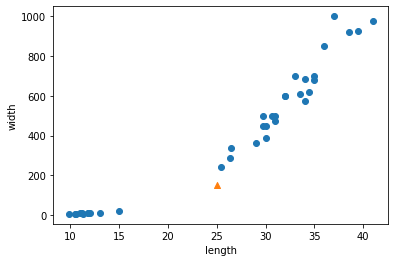

In [17]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [38]:
distances, indexes = kn.kneighbors([[25, 150]])
print(indexes)

[[16 10 14 11 34]]


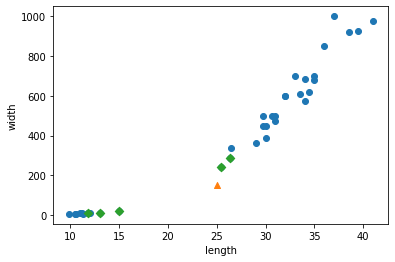

In [19]:
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [23]:
print(train_input[indexes])
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]
[[1. 0. 0. 1. 0.]]


In [24]:
print(distances)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


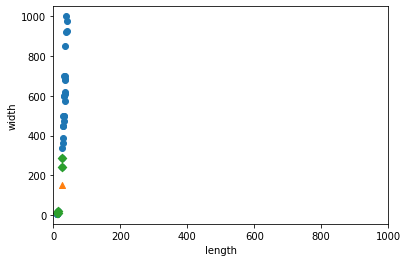

In [26]:
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker = 'D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('width')
plt.show()

#데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다. 알고리즘이 거리 기반일때 더욱 그렇다.
#데이터를 제대로 사용하려면 특성값을 일정한 기준으로 맞추어야 한다. 이런 작업을 데이터 전처리 라고 한다.
# 데이터 전처리에서 가장 많이 사용하는 방법은 표준점수 이다.

In [28]:
mean = np.mean(train_input, axis=0) #평균
std = np.std(train_input, axis=0) #표준점수

print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [29]:
train_scaled = (train_input - mean) / std

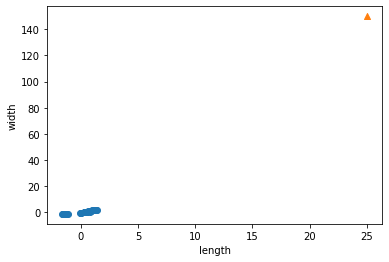

In [30]:
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^') #비교값도 표준편차 계산해줘야한다.
plt.xlabel('length')
plt.ylabel('width')
plt.show()

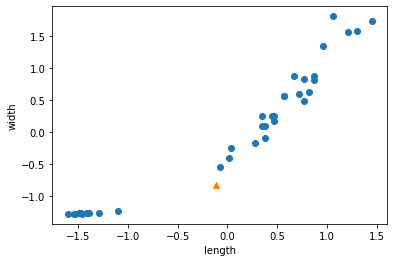

In [33]:
new = ([25, 150]-mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker="^")
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [36]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

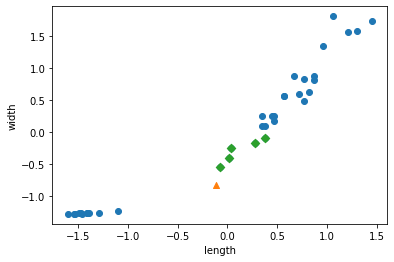

In [37]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker="D") #각각의 인덱스에 맞는 width와 height값
plt.xlabel('length')
plt.ylabel('width')
plt.show()